# Wrangle and Analyze Data



## Gathering Data
Gather each of the three pieces of data as described below:

The WeRateDogs Twitter archive: twitter_archive_enhanced.csv

The tweet image predictions (image_predictions.tsv) i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [71]:
# import packages 
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Dataset 1: The WeRateDogs Twitter archive *(on-hand file provided by udacity.com)*

In [72]:
# Load The WeRateDogs Twitter archive 
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [73]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### Dataset 2: The tweet image predictions

In [5]:
# Download tweet image predictions from Udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
reponse =  requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(reponse.content)

##### Dataset 3: Each tweet's retweet count and favorite ("like") count

In [6]:
# Twitter API authentation
consumer_key = 'BsBUDaSdPAkB9SfHFqmpvuFqJ'
consumer_secret = 'JN5IoqKp5lZ3NiOCCC1BTMzj3GyMuwmo3CbgIyjsWnwUO9wajU'
access_token = '1284351187186143232-gZ0OLYVipnJdlRgN9RGXsyPCrBZSm4'
access_secret = 'kIJ5nvkLDGQu8r9EVqCSX3H3blDUhKx6p1E2uBEouUkYY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Twitter API query
id_list = archive.tweet_id.tolist()
for tweet_id in id_list:
    try:
        start = time.time()
        status = api.get_status(tweet_id, tweet_mode='extended')
        json_str = json.dumps(status._json)
        with open ("tweet_json.txt","a") as file:
            file.write(json_str)
            file.write('\n')
        end = time.time()
        print(tweet_id,"succeeded in",end-start)
    except:
        print(tweet_id,"error")

892420643555336193 succeeded in 0.9814538955688477
892177421306343426 succeeded in 0.9182109832763672
891815181378084864 succeeded in 0.9615607261657715
891689557279858688 succeeded in 0.7617380619049072
891327558926688256 succeeded in 0.733330488204956
891087950875897856 succeeded in 0.7161791324615479
890971913173991426 succeeded in 0.8182063102722168
890729181411237888 succeeded in 0.7440035343170166
890609185150312448 succeeded in 0.7749922275543213
890240255349198849 succeeded in 0.7906675338745117
890006608113172480 succeeded in 0.7768499851226807
889880896479866881 succeeded in 0.9196124076843262
889665388333682689 succeeded in 0.8316535949707031
889638837579907072 succeeded in 0.8271565437316895
889531135344209921 succeeded in 0.8905477523803711
889278841981685760 succeeded in 0.7748963832855225
888917238123831296 succeeded in 0.8136470317840576
888804989199671297 succeeded in 0.7288217544555664
888554962724278272 succeeded in 0.9231369495391846
888202515573088257 error
8880784

860177593139703809 succeeded in 0.7486701011657715
859924526012018688 succeeded in 0.8284010887145996
859851578198683649 succeeded in 0.8483085632324219
859607811541651456 succeeded in 0.7498743534088135
859196978902773760 succeeded in 0.8109428882598877
859074603037188101 succeeded in 0.8087427616119385
858860390427611136 succeeded in 0.8482897281646729
858843525470990336 succeeded in 0.8717174530029297
858471635011153920 succeeded in 0.8003153800964355
858107933456039936 succeeded in 0.8380722999572754
857989990357356544 succeeded in 0.7957088947296143
857746408056729600 succeeded in 0.7570533752441406
857393404942143489 succeeded in 0.8439929485321045
857263160327368704 succeeded in 0.83935546875
857214891891077121 succeeded in 0.7836995124816895
857062103051644929 succeeded in 0.7302834987640381
857029823797047296 succeeded in 0.7920472621917725
856602993587888130 error
856543823941562368 succeeded in 0.7609281539916992
856526610513747968 succeeded in 0.822350263595581
856330835276

833124694597443584 succeeded in 0.8428282737731934
832998151111966721 succeeded in 0.8426640033721924
832769181346996225 succeeded in 1.0748183727264404
832757312314028032 succeeded in 0.8823542594909668
832682457690300417 succeeded in 0.8409485816955566
832645525019123713 succeeded in 0.8433561325073242
832636094638288896 succeeded in 0.9187114238739014
832397543355072512 succeeded in 0.7968590259552002
832369877331693569 succeeded in 1.1490659713745117
832273440279240704 succeeded in 0.836240291595459
832215909146226688 succeeded in 0.8600161075592041
832215726631055365 succeeded in 0.8239133358001709
832088576586297345 succeeded in 0.8038129806518555
832040443403784192 succeeded in 0.9767992496490479
832032802820481025 succeeded in 0.9455840587615967
831939777352105988 succeeded in 0.7822878360748291
831926988323639298 succeeded in 0.9318201541900635
831911600680497154 succeeded in 0.8023908138275146
831670449226514432 succeeded in 0.8392786979675293
831650051525054464 succeeded in 

813202720496779264 succeeded in 0.8803379535675049
813187593374461952 succeeded in 0.7549924850463867
813172488309972993 succeeded in 0.7210612297058105
813157409116065792 succeeded in 0.7962291240692139
813142292504645637 succeeded in 0.8074758052825928
813130366689148928 succeeded in 0.8203287124633789
813127251579564032 succeeded in 0.8133165836334229
813112105746448384 succeeded in 0.8378074169158936
813096984823349248 succeeded in 0.835730791091919
813081950185472002 succeeded in 0.8399655818939209
813066809284972545 succeeded in 1.0367767810821533
813051746834595840 succeeded in 0.9697349071502686
812781120811126785 succeeded in 0.915555477142334
812747805718642688 error
812709060537683968 succeeded in 8.33414602279663
812503143955202048 succeeded in 0.9161856174468994
812466873996607488 succeeded in 0.8420131206512451
812372279581671427 succeeded in 2.436755895614624
811985624773361665 succeeded in 2.5355429649353027
811744202451197953 succeeded in 4.0836896896362305
81164768643

791774931465953280 succeeded in 0.812786340713501
791672322847637504 succeeded in 0.8160581588745117
791406955684368384 succeeded in 0.822946310043335
791312159183634433 succeeded in 0.8134787082672119
791026214425268224 succeeded in 0.8389427661895752
790987426131050500 succeeded in 0.8317713737487793
790946055508652032 succeeded in 0.7628364562988281
790723298204217344 succeeded in 0.7532491683959961
790698755171364864 succeeded in 0.8335037231445312
790581949425475584 succeeded in 0.7744958400726318
790337589677002753 succeeded in 0.7998495101928711
790277117346975746 succeeded in 0.8033416271209717
790227638568808452 succeeded in 0.8826029300689697
789986466051088384 succeeded in 0.827625036239624
789960241177853952 succeeded in 0.837925910949707
789903600034189313 succeeded in 0.9294743537902832
789628658055020548 succeeded in 0.8007981777191162
789599242079838210 succeeded in 1.1840448379516602
789530877013393408 succeeded in 0.8897824287414551
789314372632018944 succeeded in 0.7

770293558247038976 succeeded in 0.835498571395874
770093767776997377 succeeded in 0.7589583396911621
770069151037685760 succeeded in 0.8808181285858154
769940425801170949 succeeded in 0.8081386089324951
769695466921623552 succeeded in 0.7480278015136719
769335591808995329 succeeded in 0.844752311706543
769212283578875904 succeeded in 0.8481380939483643
768970937022709760 succeeded in 0.8339576721191406
768909767477751808 succeeded in 0.851046085357666
768855141948723200 succeeded in 0.8504164218902588
768609597686943744 succeeded in 0.7762811183929443
768596291618299904 succeeded in 0.8101704120635986
768554158521745409 succeeded in 0.833301305770874
768473857036525572 succeeded in 0.7855086326599121
768193404517830656 succeeded in 0.8528170585632324
767884188863397888 succeeded in 0.7536520957946777
767754930266464257 succeeded in 0.7811076641082764
767500508068192258 succeeded in 0.8016347885131836
767191397493538821 succeeded in 0.8059539794921875
767122157629476866 succeeded in 0.8

749317047558017024 succeeded in 0.7258937358856201
749075273010798592 succeeded in 0.84090256690979
749064354620928000 succeeded in 0.7958712577819824
749036806121881602 succeeded in 0.711639404296875
748977405889503236 succeeded in 0.7320985794067383
748932637671223296 succeeded in 0.8310816287994385
748705597323898880 succeeded in 0.7997684478759766
748699167502000129 succeeded in 0.8412380218505859
748692773788876800 succeeded in 0.7515673637390137
748575535303884801 succeeded in 0.7780039310455322
748568946752774144 succeeded in 0.7489316463470459
748346686624440324 succeeded in 0.7608184814453125
748337862848962560 succeeded in 0.7641956806182861
748324050481647620 succeeded in 0.7574386596679688
748307329658011649 succeeded in 2.11234712600708
748220828303695873 succeeded in 0.7270317077636719
747963614829678593 succeeded in 0.716245174407959
747933425676525569 succeeded in 0.7442319393157959
747885874273214464 succeeded in 0.775848388671875
747844099428986880 succeeded in 0.7654

727155742655025152 succeeded in 0.8045210838317871
726935089318363137 succeeded in 0.8470194339752197
726887082820554753 succeeded in 1.1967699527740479
726828223124897792 succeeded in 0.9050147533416748
726224900189511680 succeeded in 0.8416295051574707
725842289046749185 succeeded in 0.8549683094024658
725786712245440512 succeeded in 0.8676767349243164
725729321944506368 succeeded in 0.9017555713653564
725458796924002305 succeeded in 0.7789208889007568
724983749226668032 succeeded in 0.7583611011505127
724771698126512129 succeeded in 0.7734813690185547
724405726123311104 succeeded in 0.8308029174804688
724049859469295616 succeeded in 0.8850226402282715
724046343203856385 succeeded in 0.7925269603729248
724004602748780546 succeeded in 0.8019006252288818
723912936180330496 succeeded in 0.7981407642364502
723688335806480385 succeeded in 1.036768913269043
723673163800948736 succeeded in 0.8567721843719482
723179728551723008 succeeded in 0.8297936916351318
722974582966214656 succeeded in 

707297311098011648 succeeded in 0.758420467376709
707059547140169728 succeeded in 0.7128543853759766
707038192327901184 succeeded in 0.8021619319915771
707021089608753152 succeeded in 0.7907576560974121
707014260413456384 succeeded in 0.7646386623382568
706904523814649856 succeeded in 0.8509392738342285
706901761596989440 succeeded in 0.7479321956634521
706681918348251136 succeeded in 0.801856279373169
706644897839910912 succeeded in 0.8968560695648193
706593038911545345 succeeded in 0.736102819442749
706538006853918722 succeeded in 0.7243525981903076
706516534877929472 succeeded in 0.796159029006958
706346369204748288 succeeded in 0.7776250839233398
706310011488698368 succeeded in 0.7874345779418945
706291001778950144 succeeded in 0.8780355453491211
706265994973601792 succeeded in 0.7953236103057861
706169069255446529 succeeded in 0.8046014308929443
706166467411222528 succeeded in 0.8299784660339355
706153300320784384 succeeded in 2.2069733142852783
705975130514706432 succeeded in 0.8

694001791655137281 succeeded in 1.0837578773498535
693993230313091072 succeeded in 1.05487060546875
693942351086120961 succeeded in 0.8929235935211182
693647888581312512 succeeded in 0.8915045261383057
693644216740769793 succeeded in 0.9110865592956543
693642232151285760 succeeded in 0.7745504379272461
693629975228977152 succeeded in 1.9734315872192383
693622659251335168 succeeded in 1.9394786357879639
693590843962331137 succeeded in 1.0301856994628906
693582294167244802 succeeded in 1.2396035194396973
693486665285931008 succeeded in 0.7551944255828857
693280720173801472 succeeded in 0.9718925952911377
693267061318012928 succeeded in 0.7717399597167969
693262851218264065 succeeded in 0.811784029006958
693231807727280129 succeeded in 0.8998510837554932
693155686491000832 succeeded in 0.8578696250915527
693109034023534592 succeeded in 1.8278305530548096
693095443459342336 succeeded in 2.9715938568115234
692919143163629568 succeeded in 0.9988040924072266
692905862751522816 succeeded in 0.

684460069371654144 succeeded in 1.0388519763946533
684241637099323392 succeeded in 0.764611005783081
684225744407494656 succeeded in 0.717735767364502
684222868335505415 succeeded in 0.7243053913116455
684200372118904832 succeeded in 0.7129521369934082
684195085588783105 succeeded in 0.7684516906738281
684188786104872960 succeeded in 0.8399932384490967
684177701129875456 succeeded in 0.7236123085021973
684147889187209216 succeeded in 0.7940673828125
684122891630342144 succeeded in 0.8015651702880859
684097758874210310 succeeded in 0.793464183807373
683857920510050305 succeeded in 0.8110597133636475
683852578183077888 succeeded in 0.7568795680999756
683849932751646720 succeeded in 0.7894415855407715
683834909291606017 succeeded in 0.814173698425293
683828599284170753 succeeded in 0.8266682624816895
683773439333797890 succeeded in 0.8415694236755371
683742671509258241 succeeded in 0.8048214912414551
683515932363329536 succeeded in 0.791888952255249
683498322573824003 succeeded in 0.87866

677328882937298944 succeeded in 1.1981759071350098
677314812125323265 succeeded in 0.7244222164154053
677301033169788928 succeeded in 0.7657370567321777
677269281705472000 succeeded in 0.7572047710418701
677228873407442944 succeeded in 0.789696455001831
677187300187611136 succeeded in 0.8132381439208984
676975532580409345 succeeded in 0.7541470527648926
676957860086095872 succeeded in 0.7908744812011719
676949632774234114 succeeded in 0.743633508682251
676948236477857792 succeeded in 0.813363790512085
676946864479084545 succeeded in 0.7377376556396484
676942428000112642 succeeded in 0.7841870784759521
676936541936185344 succeeded in 0.7676682472229004
676916996760600576 succeeded in 0.6965439319610596
676897532954456065 succeeded in 0.7427666187286377
676864501615042560 succeeded in 0.9731674194335938
676821958043033607 succeeded in 1.260298252105713
676819651066732545 succeeded in 0.8474757671356201
676811746707918848 succeeded in 0.7880702018737793
676776431406465024 succeeded in 0.8

673612854080196609 succeeded in 0.7614197731018066
673583129559498752 succeeded in 0.8430294990539551
673580926094458881 succeeded in 0.7590293884277344
673576835670777856 succeeded in 0.7163982391357422
673363615379013632 succeeded in 0.7636988162994385
673359818736984064 succeeded in 0.7603321075439453
673355879178194945 succeeded in 0.7168292999267578
673352124999274496 succeeded in 1.5127477645874023
673350198937153538 succeeded in 0.7288315296173096
673345638550134785 succeeded in 0.8109517097473145
673343217010679808 succeeded in 0.7849621772766113
673342308415348736 succeeded in 0.7209270000457764
673320132811366400 succeeded in 0.7999095916748047
673317986296586240 succeeded in 0.7585673332214355
673295268553605120 succeeded in 0.7141528129577637
673270968295534593 succeeded in 0.7245714664459229
673240798075449344 succeeded in 0.7325453758239746
673213039743795200 succeeded in 0.7050654888153076
673148804208660480 succeeded in 0.7185897827148438
672997845381865473 succeeded in

670420569653809152 succeeded in 1.1118717193603516
670417414769758208 succeeded in 0.7688305377960205
670411370698022913 succeeded in 0.7237365245819092
670408998013820928 succeeded in 0.7123477458953857
670403879788544000 succeeded in 0.7268152236938477
670385711116361728 succeeded in 0.6968216896057129
670374371102445568 succeeded in 0.7355237007141113
670361874861563904 succeeded in 0.7306051254272461
670338931251150849 succeeded in 0.9483993053436279
670319130621435904 succeeded in 0.7270138263702393
670303360680108032 succeeded in 0.7167370319366455
670290420111441920 succeeded in 0.7398827075958252
670093938074779648 succeeded in 0.7297074794769287
670086499208155136 succeeded in 0.7202129364013672
670079681849372674 succeeded in 0.7893462181091309
670073503555706880 succeeded in 0.7241964340209961
670069087419133954 succeeded in 0.6853282451629639
670061506722140161 succeeded in 0.7087817192077637
670055038660800512 succeeded in 0.7291944026947021
670046952931721218 succeeded in

666051853826850816 error
666050758794694657 error
666049248165822465 error
666044226329800704 error
666033412701032449 error
666029285002620928 error
666020888022790149 succeeded in 0.7287039756774902


In [8]:
# Load data from json_tweet.txt
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
        
# Count number of line in this file        
count = len(open('tweet_json.txt').readlines())

# Retrieve the id, favorite_count, and retweet_count and store the data into a new dataframe
df_list = []
for index in range(count-1):
    tweet_id = data[index]['id']
    fav_count = data[index]['favorite_count']
    ret_count = data[index]['retweet_count']
    df_list.append({'tweet_id':tweet_id, 
                'favorite_count':fav_count,
                'retweet_count': ret_count})
    tweet_count = pd.DataFrame(df_list,columns = ['tweet_id','favorite_count','retweet_count'])

-----

## Assessing Data
#### Quality
##### `archive` table
+ Useless retweeted info (we only want the original ratings according to instructions)
+ inconsistency with rating numerator and denominator columns
+ Rating denominator equals to "0" for *tweet_id:835246439529840640*
+ Redundant information in the "text" column (repeated rating and short link)
+ Ambiguous information in the "source" column
+ Missing values (2297 instead of 2356) and repeated info in "expanded-url" column (e.g.url repeated three times for *tweet_id: 835152434251116546*)

##### `tweet_count` table
+ Missing values (2325 instead of 2356)

*(Before accessing the `image` table, I first cleaned the useless retweeted tweet to get the accurate number of rating that we need for this data wrangling)*

##### `image` table
+ Missing values (2075 instead of 2097)
+ Unnecessary columns except "tweet_id" and "jpg.url"

#### Tidiness
+ One variable (dog_stage) in four columns in `archive` table
+ Three sub-tables should be merged into one table as tweet_id duplicated in all datasets

*Note: concerning the missing values in `tweet_count` and `image` tables, I chose the minimum number (2075, same as the total number in `image`table) since we target to the **original ratings that have pictures**.*

##### `archive` table

In [9]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [13]:
# Check the info about dogs rated "0"
archive.expanded_urls[315]

'https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1'

In [14]:
archive.expanded_urls[1016]

'https://twitter.com/dog_rates/status/746906459439529985/photo/1'

In [15]:
# Check duplicated id
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
# Check the information about "source" column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# Look at 
archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [18]:
archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

##### `tweet_count` table

In [19]:
tweet_count

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36243,7716
1,892177421306343426,31266,5701
2,891815181378084864,23537,3780
3,891689557279858688,39541,7878
4,891327558926688256,37764,8486
...,...,...,...
4507,668627278264475648,300,108
4508,668625577880875008,364,121
4509,668623201287675904,1357,709
4510,668620235289837568,189,38


In [20]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 3 columns):
tweet_id          4512 non-null int64
favorite_count    4512 non-null int64
retweet_count     4512 non-null int64
dtypes: int64(3)
memory usage: 105.9 KB


In [21]:
tweet_count.describe()

,tweet_id,favorite_count,retweet_count
count,4.512000e+03,4512.000000,4512.000000
mean,7.442165e+17,7739.657801,2763.636525
std,6.795028e+16,11806.177687,4601.255104
min,6.660209e+17,0.000000,1.000000
25%,6.801724e+17,1457.500000,587.750000
50%,7.254588e+17,3408.000000,1325.000000
75%,8.002385e+17,9503.500000,3200.250000
max,8.924206e+17,156364.000000,77892.000000


In [22]:
# Before acessing the image table, I first cleaned the useless retweeted tweet to get the accurate number of rating 
# that we need for this data wrangling.
archive = archive[archive.retweeted_status_id.isnull()]
archive = archive[archive.in_reply_to_status_id.isnull()]
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

##### `image` table

In [23]:
image = pd.read_csv('image-predictions.tsv',sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image.iloc[2070]

tweet_id                                 891327558926688256
jpg_url     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
img_num                                                   2
p1                                                   basset
p1_conf                                            0.555712
p1_dog                                                 True
p2                                         English_springer
p2_conf                                             0.22577
p2_dog                                                 True
p3                              German_short-haired_pointer
p3_conf                                            0.175219
p3_dog                                                 True
Name: 2070, dtype: object

In [27]:
image.query('img_num >= 2')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True


## Cleaning Data

*Note1: concerning the missing values in `tweet_count` and `image` tables, I chose the minimum number (2075, same as the total number in `image`table) since we target to the **original ratings that have pictures**.* <br>
*Note2: the tweet (id:835246439529840640) was a retweeted tweet and was cleaned in the previous section.*

In [28]:
# Make a copy of the archive table
a_clean = archive.copy()

##### Define
1. Drop the retweeted rows and the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp" columns

In [29]:
# Drop the retweeted rows and the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id", 
#"retweeted_status_timestamp" columns
a_clean = a_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


##### Define
2. Add a new column "rating" with the calculated rating (formula: rating_numerator/rating_denominator)

In [30]:
#Add a new column "rating" with the calculated rating (formula: rating_numerator/rating_denominator)
a_clean['rating'] = a_clean['rating_numerator']/a_clean['rating_denominator']

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3


##### Define

3. Move the short link into a new created column "short_url" and drop the long and redudant "expanded_urls" column (which also has some missing values - 2094 instead of 2097)<br>
4. Delete the short link and keep the original text as that in tweet in the "text" column

In [31]:
# Display the original "text" column
a_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [32]:
# Count the lengh of the short link as it keeps the same length in the dataset
len(" https://t.co/MgUWQ76dJU")

24

In [33]:
# Move the short link into a new created column and keep the original text as that in tweet in the "text" column
a_clean['short_url'] = a_clean['text'].str[-23:]
a_clean['text'] = a_clean['text'].str[:-24]

In [34]:
# Test
a_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [35]:
# Test
a_clean.short_url[0]

'https://t.co/MgUWQ76dJU'

In [36]:
# Drop the long and redundant "expanded_urls" column
a_clean = a_clean.drop(['expanded_urls'], axis=1)

In [37]:
# Test
a_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,short_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB


##### Define
5. Only keep the essential information in the middle in the "source" column(iPhone, Vine, Web, and TweetDeck)

In [38]:
a_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
# Only keep the essential information in the middle in the "source" column(iPhone, Vine, Web, and TweetDeck)
a_clean['source'] = a_clean['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':"iPhone",
                                               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': "Vine",
                                               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': "Web",
                                               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':"TweetDeck"})
# Test
a_clean.source.value_counts()

iPhone       1964
Vine           91
Web            31
TweetDeck      11
Name: source, dtype: int64

##### Define
6. Convert the datatype of "timestamp" column to datetime

In [40]:
# Convert the datatype of "timestamp" column to datetime.
a_clean.timestamp = pd.to_datetime(a_clean.timestamp)

# Test
a_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
rating                2097 non-null float64
short_url             2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(8)
memory usage: 309.4+ KB


##### Define
7. Create a new column "dog_stage" containing the information in the "doggo","floofer","pupper", and "puppo" columns and drop the intermediate columns.<br>
*(Note: some tweets contain two dog stages. Some of them mention two ages for one dog; others have two dogs in one image.)*

In [41]:
def find_dog_stage(a_clean):
    dog_stage = []
    for i, row in a_clean.iterrows():
        if row['doggo'] == "doggo" and row['floofer'] == "floofer":
            dog_stage.append('doggo/floofer')
        elif row['doggo'] == "doggo" and row['puppo'] == "puppo":
            dog_stage.append('doggo/puppo')
        elif row['doggo'] == "doggo" and row['pupper'] == "pupper":
            dog_stage.append('doggo/pupper')
        elif row['doggo'] == "doggo":
            dog_stage.append('doggo')
        elif row['floofer'] == "floofer":
            dog_stage.append('floofer')
        elif row['puppo'] == "puppo":
            dog_stage.append('puppo')
        elif row['pupper'] == "pupper":
            dog_stage.append('pupper')
        else:
            dog_stage.append('None')
    return dog_stage

a_clean['dog_stage'] = find_dog_stage(a_clean)
a_clean.dog_stage.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo/pupper        9
doggo/floofer       1
doggo/puppo         1
Name: dog_stage, dtype: int64

In [42]:
# Test
doggo_floofer = a_clean.query('doggo == "doggo" and floofer == "floofer"').shape[0]
doggo_puppo = a_clean.query('doggo == "doggo" and puppo == "puppo"').shape[0]
doggo_pupper = a_clean.query('doggo == "doggo" and pupper == "pupper"').shape[0]
print('pupper:',a_clean.query('pupper == "pupper"').shape[0] - doggo_pupper)
print('doggo:', a_clean.query('doggo == "doggo"').shape[0] - doggo_floofer - doggo_puppo - doggo_pupper)
print('puppo:',a_clean.query('puppo == "puppo"').shape[0] - doggo_puppo)
print('floofer:',a_clean.query('floofer == "floofer"').shape[0] - doggo_floofer)
print('doggo/pupper:',doggo_pupper)
print('doggo/floofer:',doggo_floofer)
print('doggo/puppo:',doggo_puppo)

pupper: 221
doggo: 72
puppo: 23
floofer: 9
doggo/pupper: 9
doggo/floofer: 1
doggo/puppo: 1


In [43]:
# Drop the intermediate columns
a_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,short_url,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1.3,https://t.co/MgUWQ76dJU,None


##### Define
8. Arrange the order of columns

In [44]:
# Arrange the order of columns
a_clean = a_clean[['tweet_id','timestamp','source','text','name','dog_stage','rating_numerator','rating_denominator','rating','short_url']]

# Test
a_clean.head(1)

,tweet_id,timestamp,source,text,name,dog_stage,rating_numerator,rating_denominator,rating,short_url
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,13,10,1.3,https://t.co/MgUWQ76dJU


In [45]:
# Save the cleaned dataset into "a_clean.csv"
a_clean.to_csv('a_clean.csv', index=False)

In [46]:
# Make a copy of "image" table
i_clean = image.copy()
i_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [47]:
# Only keep "tweet_id" and "jpg.url" columns in the `image` table (as other information will be used for simulating the confusion matrix)
i_clean = i_clean[['tweet_id','jpg_url']]

#Test
i_clean.head(3)

,tweet_id,jpg_url
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg


In [77]:
# Save the cleaned dataset into "a_clean.csv"
i_clean.to_csv('i_clean.csv', index=False)

In [78]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 3 columns):
tweet_id          4512 non-null int64
favorite_count    4512 non-null int64
retweet_count     4512 non-null int64
dtypes: int64(3)
memory usage: 105.9 KB


In [79]:
# Use inner join to merge the dataframes to ensure the data completeness
df = pd.merge(i_clean, a_clean, on=['tweet_id'],how='inner')
WeRateDog_tweet_cleaned = pd.merge(df, tweet_count, on=['tweet_id'], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
jpg_url               1971 non-null object
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
name                  1971 non-null object
dog_stage             1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
rating                1971 non-null float64
short_url             1971 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 184.8+ KB


In [80]:
# Arrange the order of columns
WeRateDog_tweet_cleaned = WeRateDog_tweet_cleaned[['tweet_id','timestamp','source','text','jpg_url','short_url',
                                                   'name','dog_stage','rating','favorite_count','retweet_count']]
# Test
WeRateDog_tweet_cleaned.head(1)

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08+00:00,iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://t.co/BLDqew2Ijj,None,None,0.8,2416,462


------------------

## Storing, Analyzing, and Visualizing Data

### Storing Data

In [81]:
# Save the cleaned dataset into twitter_archive_master.csv"
WeRateDog_tweet_cleaned.to_csv('twitter_archive_master.csv', index=False)

### Analyzing Data

In [82]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
0,666020888022790149,2015-11-15 22:32:08+00:00,iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://t.co/BLDqew2Ijj,None,None,0.8,2416,462
1,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://t.co/r7mOb2m0UI,a,None,0.7,121,42
2,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://t.co/y671yMhoiR,a,None,0.9,112,41
3,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://t.co/DWnyCjf2mx,a,None,0.6,272,132
4,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,https://t.co/4B7cOc1EDq,None,None,0.5,96,39


##### The tweet that was retweeted the most (also the one that get the most "favorite")

In [83]:
df.favorite_count.max()

156364

In [84]:
df.query('favorite_count == 156364')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
2260,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://t.co/7wE9LTEXC4,None,doggo,1.3,156364,77892


In [85]:
df.text[1199]

"This is Buddy. He's gaining strength. Currently an F4 tornado with wind speeds up to 260mph. Very devastating. 9/10"

In [86]:
df.jpg_url[1199]

'https://pbs.twimg.com/media/CX1AUQ2UAAAC6s-.jpg'

##### The tweet scored highest

In [87]:
df.rating.max()

177.6

In [88]:
df.query('rating == 177.6')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
2354,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5139,2476
2355,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5096,2447


In [89]:
df.text[1246]

"This is Jerry. He's a neat dog. No legs (tragic). Has more horns than a dog usually does. Bark is unique af. 5/10"

**Insight 1: The highest rating score belongs to a dog called “Atticus” with an American-flag-patterned scarf in its picture. The tweet was posted on Independence Day, 4 July 2016, for which I suppose the rating “1776” refers to this memorable day.**

##### The correlation heatmap

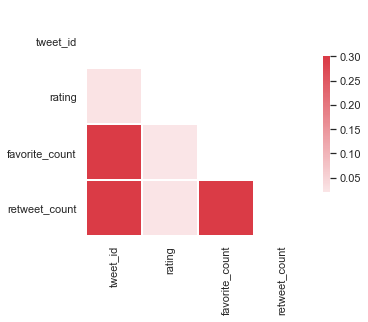

In [61]:
# Correlation Heatmap
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [62]:
# choose the data for analyzing
df_analyze = df[['source','dog_stage','rating','favorite_count','retweet_count']]
df_analyze.head(3)

,source,dog_stage,rating,favorite_count,retweet_count
0,iPhone,None,0.8,2416,462
1,iPhone,None,0.7,121,42
2,iPhone,None,0.9,112,41


In [63]:
# Group by "source" 
df_source = df_analyze.groupby('source')
df_source['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
TweetDeck,20.0,18.770000,54.318826,0.9,1.1,1.15,1.2,177.6
Web,37.0,1.081081,0.269607,0.1,0.9,1.10,1.3,1.4
iPhone,3728.0,1.087223,0.985909,0.0,1.0,1.10,1.2,42.0


**Insight 2: Most of tweets come from iPhone and the descriptive data and does not show any evidence about bias based on source given the fact that the sample size of data from web and TweetDeck is too small compared to that from iPhone.**

In [64]:
# Group by "dog_stage"
df_stage = df_analyze.groupby('dog_stage')
df_stage.rating.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,3182.0,1.194144,4.550832,0.0,1.000,1.1,1.2,177.6
doggo,124.0,1.187097,0.147040,0.8,1.100,1.2,1.3,1.4
doggo/floofer,2.0,1.100000,0.000000,1.1,1.100,1.1,1.1,1.1
doggo/pupper,16.0,1.100000,0.247656,0.5,1.150,1.2,1.2,1.3
doggo/puppo,2.0,1.300000,0.000000,1.3,1.300,1.3,1.3,1.3
floofer,14.0,1.200000,0.110940,1.0,1.125,1.2,1.3,1.3
pupper,401.0,1.071322,0.208328,0.3,1.000,1.1,1.2,2.7
puppo,44.0,1.200000,0.129399,0.9,1.100,1.2,1.3,1.4


### Visualizing Data

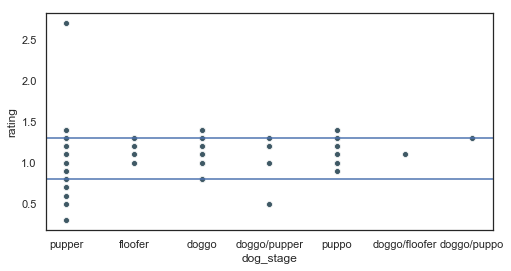

In [65]:
# Plot the rating and the correspondong dog stages data
plt.figure(figsize=(8,4))
plt_stage = sns.scatterplot(x='dog_stage',y='rating', data=df.query('dog_stage != "None"'), color="#3F5965")
plt.axhline(y=np.percentile(df.rating,10));
plt.axhline(y=np.percentile(df.rating,90));

**Insight 3: Regarding the dog stages (if mentioned in the tweet), the ratings of tweets that mention the stages, including pupper, floofer, doggo, puppo, or two of them, distribute in the middle 80% of the whole ratings. This statistic rarely shows the evidence about rating bias based on the dog stages.**

##### The "outliers" in the dataset

In [66]:
df.query('rating >= 25')

,tweet_id,timestamp,source,text,jpg_url,short_url,name,dog_stage,rating,favorite_count,retweet_count
408,670842764863651840,2015-11-29 05:52:33+00:00,iPhone,After so many requests... here you go.\n\nGood...,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,https://t.co/yfAAo1gdeY,None,None,42.0,23780,8330
409,670842764863651840,2015-11-29 05:52:33+00:00,iPhone,After so many requests... here you go.\n\nGood...,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,https://t.co/yfAAo1gdeY,None,None,42.0,23562,8231
2354,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5139,2476
2355,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,https://t.co/GRXwMxLBkh,Atticus,None,177.6,5096,2447


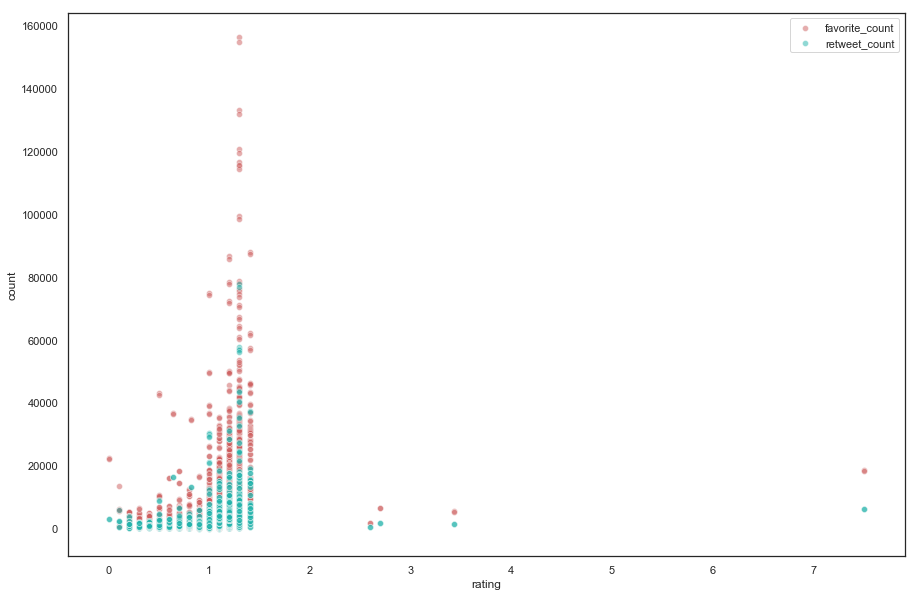

In [67]:
# Plot the rating(<25) and the corresponding favorite and retweet counts
plt.figure(figsize=(15,10))
plt_rating = sns.scatterplot(x='rating', y='favorite_count', data=df.query('rating<25'), color="indianred", alpha=.5);
plt_rating = sns.scatterplot(x='rating', y='retweet_count', data=df.query('rating<25'), color="lightseagreen", alpha=.5);
plt_rating.set(xlabel="rating", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

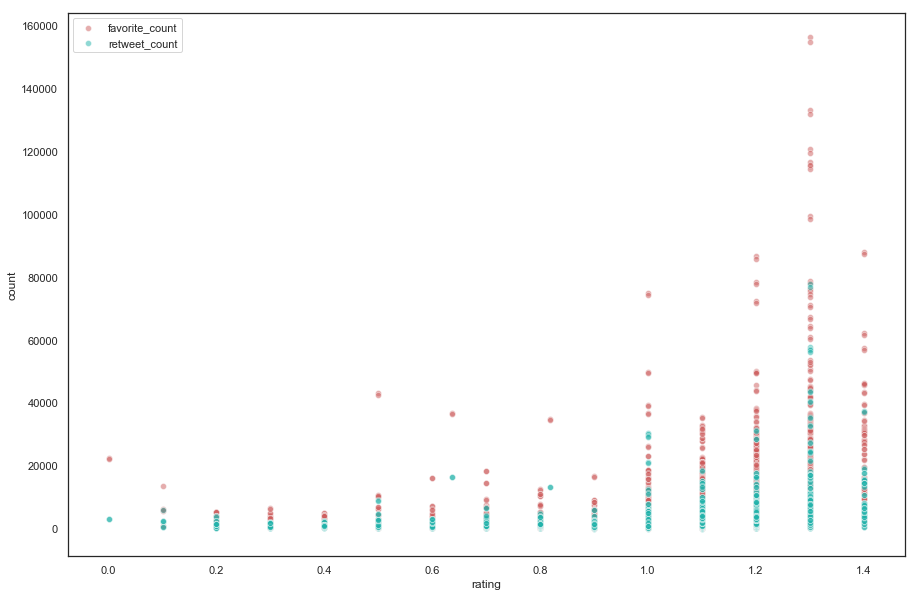

In [68]:
# Plot the rating(<2) and the corresponding favorite and retweet counts 
plt.figure(figsize=(15,10))
plt_rating = sns.scatterplot(x='rating', y='favorite_count', data=df.query('rating<2'), color="indianred", alpha=.5);
plt_rating = sns.scatterplot(x='rating', y='retweet_count', data=df.query('rating<2'), color="lightseagreen", alpha=.5);
plt_rating.set(xlabel="rating", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

**Insight 4: With the rating range from 0 to 1.4, the higher rating tends to gain more “likes”. The relationship between the retweet counts and the rating is not as strong as that between favorite counts and ratings.**

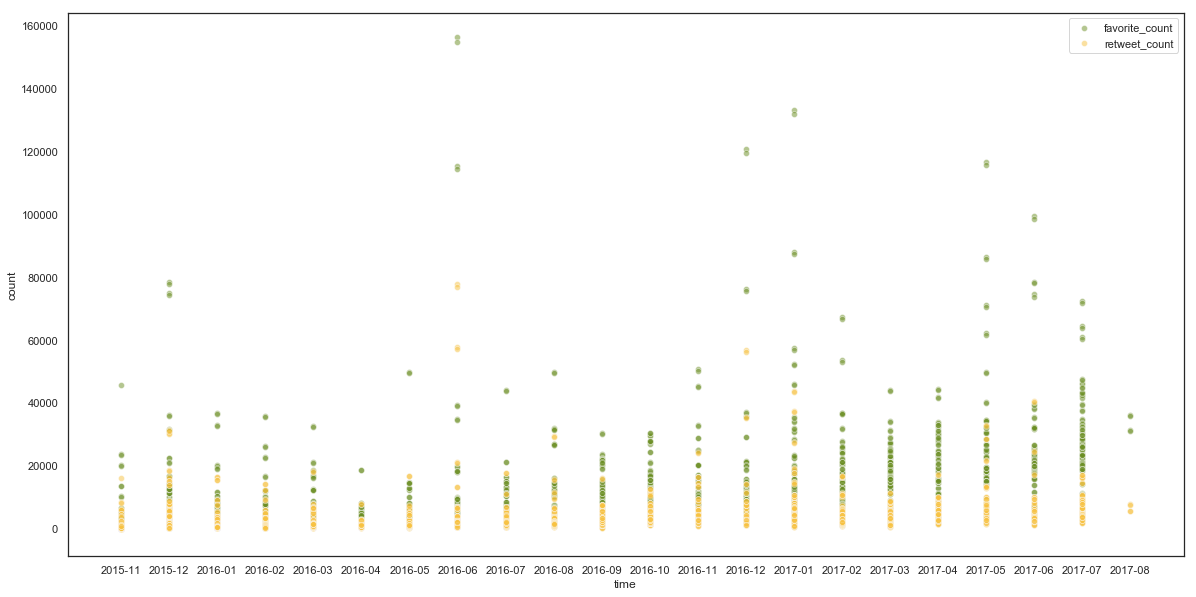

In [69]:
# Plot the time by year and month and the corresponding favorite and retweet counts
df['year_month'] = df['timestamp'].str[:-len('-15 23:05:30+00:00')]
plt.figure(figsize=(20,10))
plt_rating = sns.scatterplot(x='year_month', y='favorite_count', data=df, color="olivedrab", alpha=.5);
plt_rating = sns.scatterplot(x='year_month', y='retweet_count', data=df, color="#F7C242", alpha=.5);
plt_rating.set(xlabel="time", ylabel="count");
plt.legend(('favorite_count','retweet_count'))

**Insight 5: This visualization reiterates the history of this twitter account: in June 2016, it gained its most “likes” count; since then, it gains more and more “likes”; same as the rating records, the time does not seem to be a strong factor leading the retweet counts.**

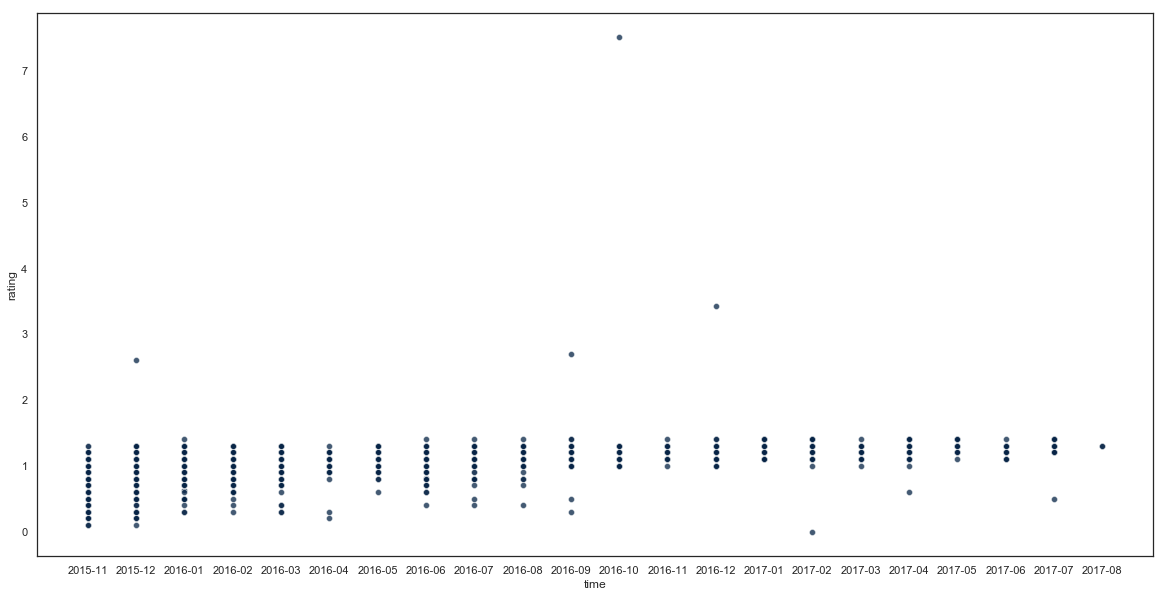

In [70]:
# Plot the time by year and month and the corresponding ratings
plt.figure(figsize=(20,10))
plt_ratedtime = sns.scatterplot(x='year_month', y='rating', data=df.query('rating<25'), color="#072446", alpha=.5);
plt_ratedtime.set(xlabel="time", ylabel="rating");

**Insight 6: as the “rating right” belongs to the owner of the account, I would like to know whether the rating habit has changed with time, so I made another scatterplot which shows clearly that the range of rating was narrowed according to the time.**